## **Time Series Prediction of Coca-Cola Stock Prices Using LSTM**

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

In [56]:
# Load the data
data = pd.read_csv('/content/Coca-Cola_stock_history.csv')

In [57]:
# Convert Date to datetime format, handling extra characters
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

In [58]:
# Set Date as index
data.set_index('Date', inplace=True)

In [59]:
# Select relevant columns
features = data[['Close', 'Volume', 'Dividends', 'Stock Splits']]

In [60]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

In [61]:
# Create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(scaled_prices, seq_length)

In [62]:
# Reshape X to fit the RNN input
X = X.reshape((X.shape[0], X.shape[1], 1))

In [63]:
# Split data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [69]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_16 (Dropout)        (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
382/382 [==============================] - 33s 70ms/step - loss: 2.7400e-04 - val_loss: 0.0014
Epoch 2/50
382/382 [==============================] - 24s 63ms/step - loss: 1.2433e-04 - val_loss: 0.0020
Epoch 3/50
382/382 [==============================] - 25s 64ms/step - loss: 1.1169e-04 - val_loss: 0.0012
Epoch 4/50
382/382 [==============================] - 21s 56ms/step - loss: 9.6475e-05 - val_loss: 0.0014
Epoch 5/50
382/382 [==============================] - 25s 66ms/step - loss: 9.3228e-05 - val_loss: 0.0026
Epoch 6/50
382/382 [==============================] - 21s 55ms/step - loss: 9.0605e-05 - val_loss: 0.0010
Epoch 7/50
382/382 [==============================] - 21s 56ms/step - loss: 9.0532e-05 - val_loss: 0.0021
Epoch 8/50
382/382 [==============================] - 20s 53ms/step - loss: 8.8728e-05 - val_loss: 8.4255e-04
Epoch 9/50
382/382 [==============================] - 31s 81ms/step - loss: 9.4301e-05 - val_loss: 0.0012
Epoch 10/50
382/382 [=====================

In [72]:
# Evaluate the model performance
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate((predicted_prices, np.zeros((predicted_prices.shape[0], 3))), axis=1))[:, 0]
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:, 0]

96/96 [==============================] - 2s 14ms/step


In [73]:
# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 25.244215153620342
Mean Absolute Error (MAE): 3.680703339364588
R-squared (R2): 0.7800762457145903
Mean Absolute Percentage Error (MAPE): 0.08267929786686115


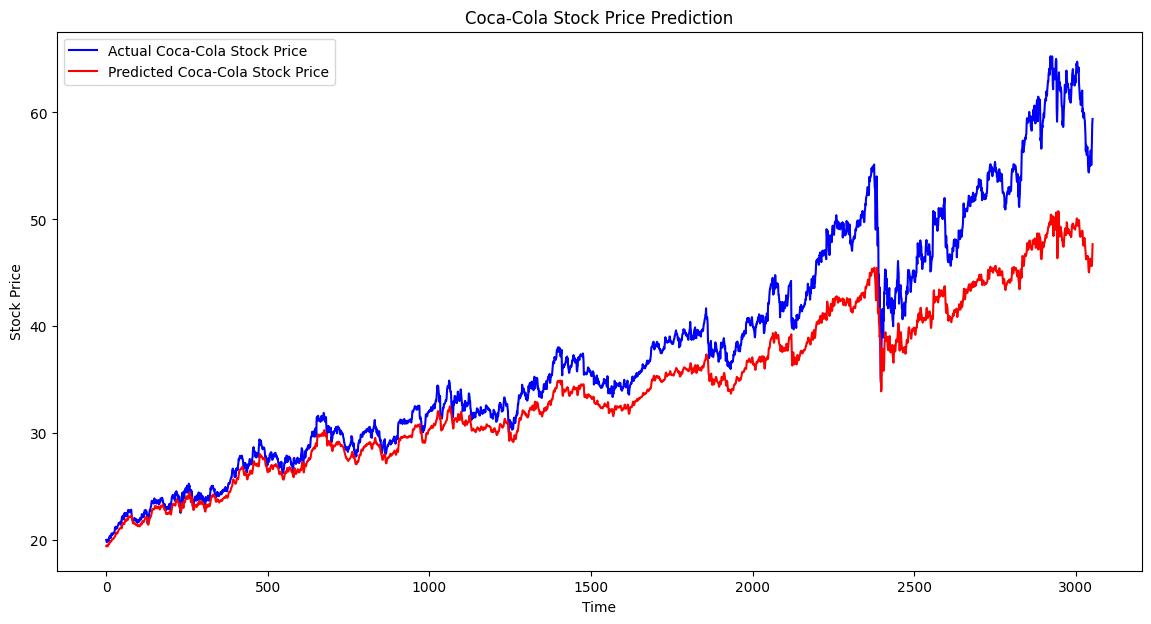

In [74]:
# Plotting the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, color='blue', label='Actual Coca-Cola Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Coca-Cola Stock Price')
plt.title('Coca-Cola Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()